In [3]:
import numpy as np 
import pandas as pd 



In [16]:
df = pd.read_csv("train.csv") #load data


In [18]:
df.head(20) 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [20]:
df.shape

(31962, 3)

## Divide the dataset in positive and negative


In [26]:
train_pos = df[df['label']==0] #selecting positive sentiment
train_neg = df[df['label']==1] #selecting negative sentiment


In [29]:
train_pos

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


## Clean the data

In [30]:
def clean_word(data):
    words = " ".join(data['tweet'])
    
    cleaned_words = " ".join([word for word in words.split()  #cleans the data and deletes irrelevants elements
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'])
    return cleaned_words

In [38]:
pos_clean_words = clean_word(train_pos)
neg_clean_words = clean_word(train_neg)





In [37]:
pos_clean_words

'when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. thanks for credit i can\'t use cause they don\'t offer wheelchair vans in pdx. bihday your majesty i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦ factsguide: society now [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. camping tomorrow dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad we won!!! love the land!!! â\x80¦ welcome here ! i\'m it\'s so ! â\x86\x9d consumer price index (mom) climbed from previous 0.2% to 0.5% in may we are so selfish. i get to see my daddy today!! ouch...junior is angryð\x9f\x98\x90#got7 i am thankful for having a paner. its ð\x9f\x98\x80 smiles all around via ig user: make people as we all know, essential oils are not made of chemicals. people blaming ha for conceded goal was it fat 

In [39]:
neg_clean_words

'calls middle school \'build the wall\' chant \'\' no comment! in retweet if you agree! lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. lets fight against ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness hey, white people: you can call people \'white\' by how the uses &amp; insecurity to lure men into i\'m not interested in a that doesn\'t address &amp; . racism is about bringsâ\x80¦ why not mocked obama for being black. aren\'t protesting because a won-they do so because trump has fuhered &amp;â\x80¦ yes it\'s when you call a gorilla because racists have long thought of black people as no betâ\x80¦ as the smaller hands show, barry probably lied about being why his game sucked more than his you point one finger millions are pointed right back at you, you might be a libtard if... take out the america... - i voted against - i voted against - i voted ag

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [45]:
def wcloud(cleaned_words):
    wordcloud = WordCloud(stopwords=STOPWORDS, #delete the stopwords
                         ).generate(cleaned_words)
    return wordcloud

In [46]:
pos_wcloud = wcloud(pos_clean_words)
neg_wcloud = wcloud(neg_clean_words)

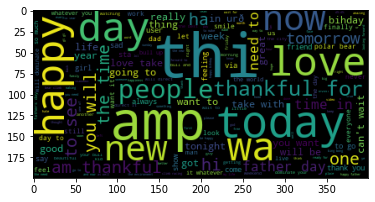

In [48]:
plt.imshow(pos_wcloud)


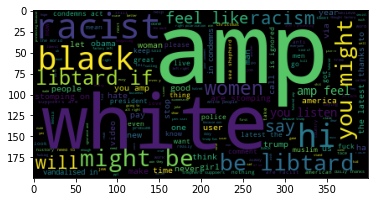

In [49]:
plt.imshow(neg_wcloud)


<AxesSubplot:>

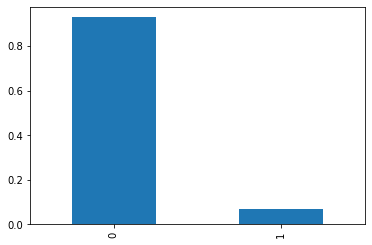

In [53]:
df['label'].value_counts(normalize = True).plot.bar()


## Data preprocessing

In [54]:
import re
import nltk
from nltk.corpus import stopwords

In [56]:
#Clean tweet
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #delete non alphabetic elements
    words = alpha_only.lower().split() #Split a string into a list
    stop = set(stopwords.words('english'))
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ziqi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df.head(20)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user user...
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exams...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome gr


In [63]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size = 0.3)


In [65]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [66]:
train_clean_tweet

['calm positive affirmation',
 'help damsel loves misery',
 'jamals family love siblings life sisters brother',
 'came h dh h first time feeling',
 'user user user user ohhh wow kareena also much',
 'homesweethome drive mum frankfu family',
 'user user bihday great day',
 'cat kitty sandy',
 'wait fly first time going sta newaddiction nervous',
 'bring boys either',
 'user user heard user monkeymomma going croft',
 'ready positive affirmation',
 'happy love joy vancouver vancity explore cruise family instamood instagood',
 'talking gun violence last night dead shooting gay nightclub orlando',
 'user living street extra trees improve happiness much years younger walkable',
 'user another fantastic moving show week well done lads mpcox orlandoshooting moving well done',
 'sons grandsons mom grandma aka gigi moma brown love',
 'made seaworld themoreyousharethemoreyouget',
 'feeling sad dead christina grimmie going stop christinagrimmie via user',
 'omg finally ps farcry gtav unchaed',
 'w

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [69]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [70]:
#Create the TFIDF+SVC model and TFIDF+multNB

svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC(random_state=0,max_iter=5000))]) 
nb_pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb', MultinomialNB())])

In [71]:
#Train the model
svc_pipe.fit(train_clean_tweet,train['label'])
nb_pipe.fit(train_clean_tweet,train['label'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [72]:
pred_svc = svc_pipe.predict(test_clean_tweet)
pred_nb = nb_pipe.predict(test_clean_tweet)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [75]:

print(accuracy_score(test['label'],pred_svc))

print(confusion_matrix(test['label'],pred_svc))


0.9636041297319846
[[8873   60]
 [ 289  367]]


In [76]:
print(accuracy_score(test['label'],pred_nb))
print(confusion_matrix(test['label'],pred_nb))


0.941078318907081
[[8933    0]
 [ 565   91]]
